/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_79925/2310244979.py:107: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_79925/2310244979.py:107: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_79925/2310244979.py:107: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_79925/2310244979.py:107: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_79925/2310244979.py:107: UserWarning: Glyph 32317 (\N{CJK UNIFIED IDEOGRAPH-7E3D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kz


=== 詳細交易統計 ===
總交易次數: 376
平均收益率: 0.04%
最大收益: 8.97%
最小收益: -10.28%
勝率: 50.80%
標準差: 2.62%
買入信號數量: 170
賣出信號數量: 206


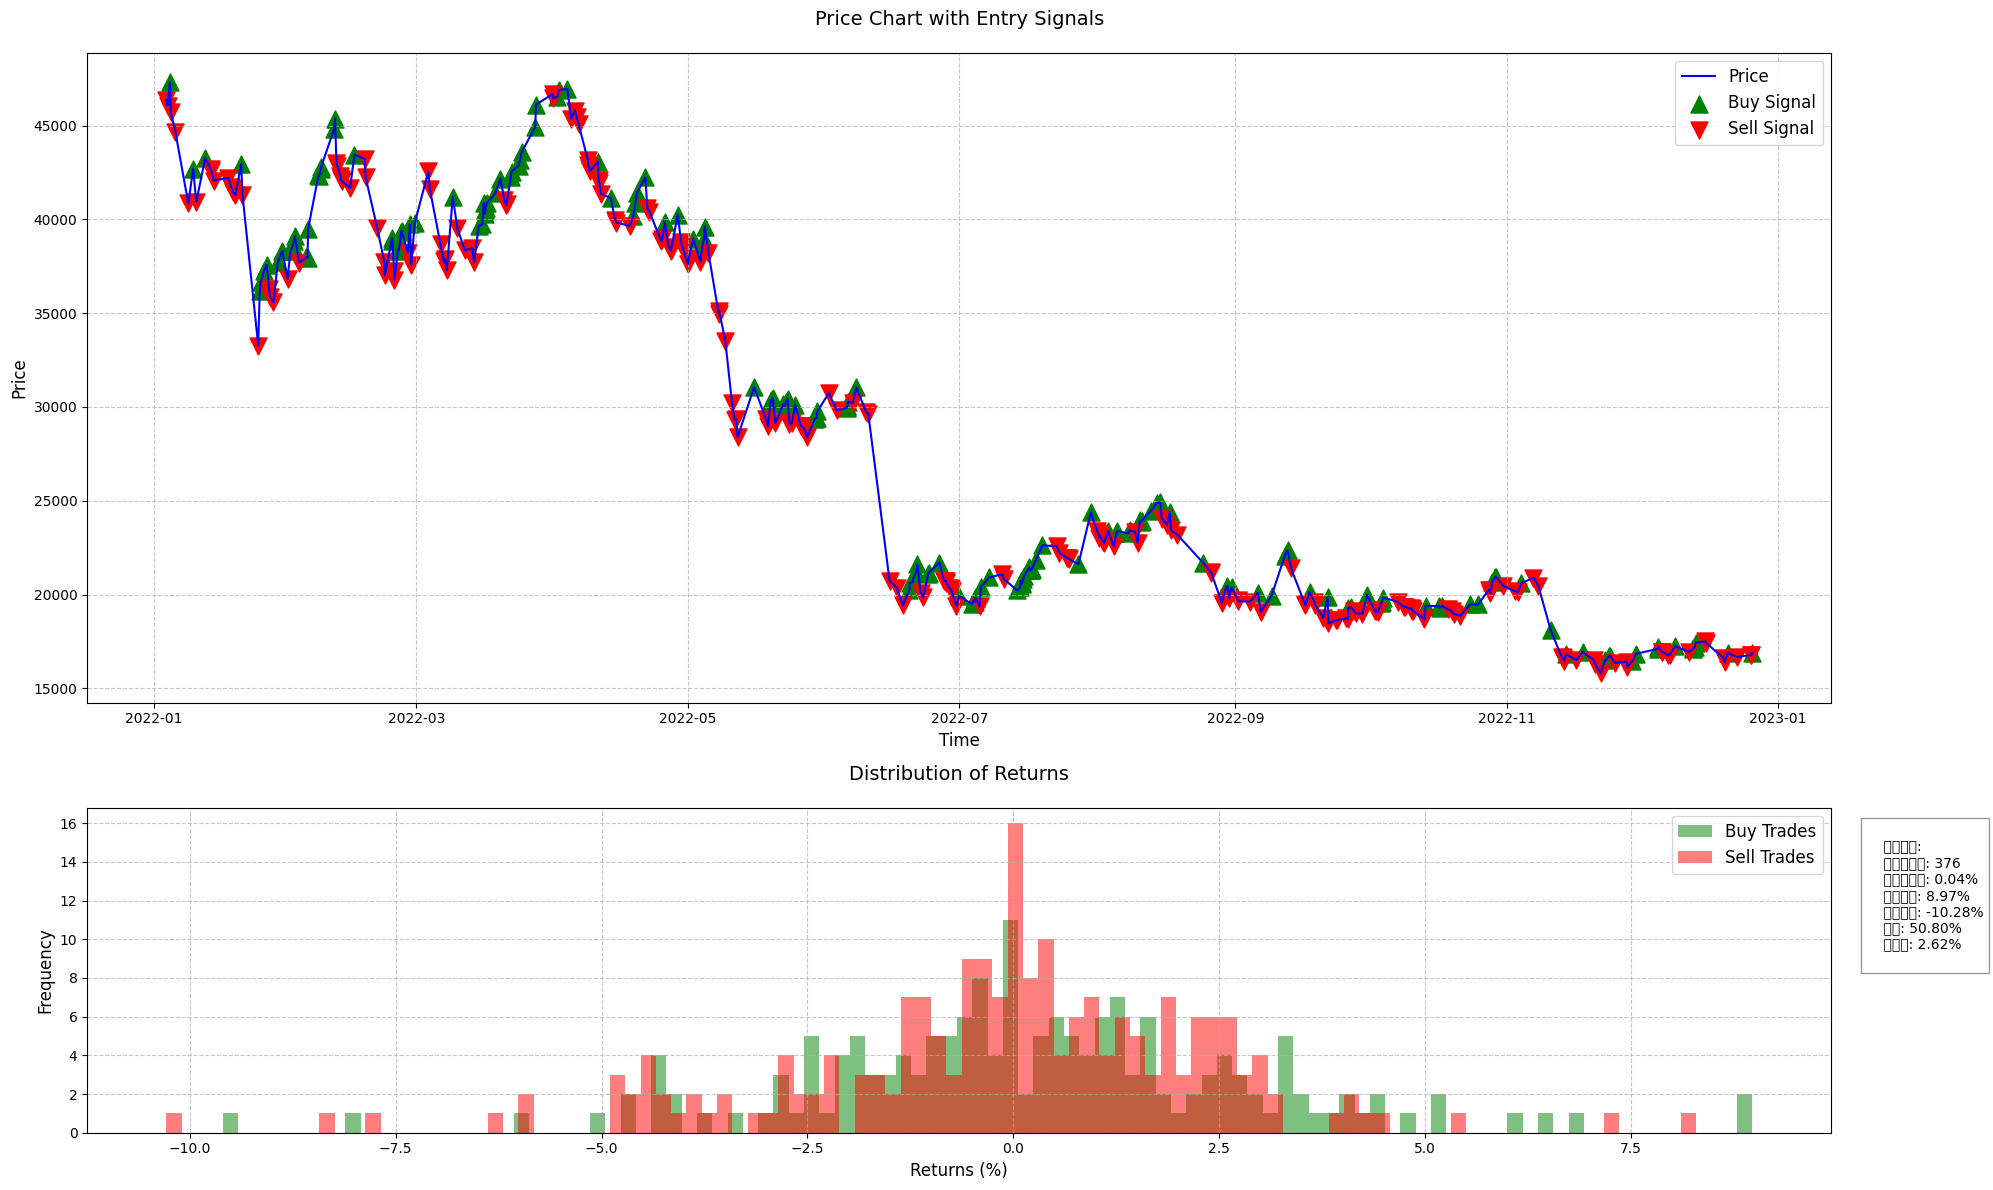

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def analyze_trading_signals(file_path):
    # Read CSV
    df = pd.read_csv(file_path)
    
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Create position results DataFrame
    position_results = []
    
    for _, row in df.iterrows():
        entry_price = row['price']
        exit_price = row['y14_close']
        
        # Calculate returns
        returns = ((exit_price - entry_price) / entry_price) * 100
        
        position_results.append({
            'timestamp': row['timestamp'],
            'entry_price': entry_price,
            'exit_price': exit_price,
            'returns': returns,
            'is_buy': row['is_buy']
        })
    
    results_df = pd.DataFrame(position_results)
    
    # Create figure with custom grid
    fig = plt.figure(figsize=(20, 12))
    gs = GridSpec(2, 1, height_ratios=[2, 1])  # 2:1 ratio for subplot heights
    
    # Price chart (larger)
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(df['timestamp'], df['price'], color='blue', label='Price', linewidth=1.5)
    
    # Buy points
    buy_points = df[df['is_buy'] == True]
    if not buy_points.empty:
        ax1.scatter(buy_points['timestamp'], 
                   buy_points['price'], 
                   color='green', 
                   marker='^', 
                   s=150,  # Increased marker size
                   label='Buy Signal')
    
    # Sell points
    sell_points = df[df['is_buy'] == False]
    if not sell_points.empty:
        ax1.scatter(sell_points['timestamp'], 
                   sell_points['price'], 
                   color='red', 
                   marker='v', 
                   s=150,  # Increased marker size
                   label='Sell Signal')
    
    ax1.set_title('Price Chart with Entry Signals', fontsize=14, pad=20)
    ax1.set_xlabel('Time', fontsize=12)
    ax1.set_ylabel('Price', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(fontsize=12)
    ax1.tick_params(axis='both', labelsize=10)
    
    # Returns histogram
    ax2 = fig.add_subplot(gs[1])
    
    # Separate buy and sell returns for different colors
    buy_returns = results_df[results_df['is_buy']]['returns']
    sell_returns = results_df[~results_df['is_buy']]['returns']
    
    
    
    # Plot histograms
    if not buy_returns.empty:
        ax2.hist(buy_returns, bins=100, alpha=0.5, color='green', label='Buy Trades')
    if not sell_returns.empty:
        ax2.hist(sell_returns, bins=100, alpha=0.5, color='red', label='Sell Trades')
    
    ax2.set_title('Distribution of Returns', fontsize=14, pad=20)
    ax2.set_xlabel('Returns (%)', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(fontsize=12)
    ax2.tick_params(axis='both', labelsize=10)
    
    # Add statistics text
    stats_text = f"""
    統計信息:
    總交易次數: {len(results_df)}
    平均收益率: {results_df['returns'].mean():.2f}%
    最大收益: {results_df['returns'].max():.2f}%
    最小收益: {results_df['returns'].min():.2f}%
    勝率: {(results_df['returns'] > 0).mean() * 100:.2f}%
    標準差: {results_df['returns'].std():.2f}%
    """
    ax2.text(1.02, 0.95, stats_text,
             transform=ax2.transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
             verticalalignment='top',
             fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Print detailed statistics
    print("\n=== 詳細交易統計 ===")
    print(f"總交易次數: {len(results_df)}")
    print(f"平均收益率: {results_df['returns'].mean():.2f}%")
    print(f"最大收益: {results_df['returns'].max():.2f}%")
    print(f"最小收益: {results_df['returns'].min():.2f}%")
    print(f"勝率: {(results_df['returns'] > 0).mean() * 100:.2f}%")
    print(f"標準差: {results_df['returns'].std():.2f}%")
    print(f"買入信號數量: {len(results_df[results_df['is_buy'] == True])}")
    print(f"賣出信號數量: {len(results_df[results_df['is_buy'] == False])}")
    
    plt.show()
    
    return results_df

# Usage
file_path = '/Users/mouyasushi/Desktop/quantDevops/Backtest_Performance/Alpha-Research/sample_output/KeltnerChannel/1h_KeltnerChannel_binance_BTCUSDT_2022-01-01_2022-12-26/1h_KeltnerChannel_Keltner Channel Strategy with MACD - Long and Short_binance_BTCUSDT_2022-01-01_2022-12-26_20250202_002441.csv'
results = analyze_trading_signals(file_path)